In [1]:
from utils.plot import plot
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape
%matplotlib inline

In [2]:
directory = "electrode_large"
numbers = range(1,4)

In [3]:
x, y, z, T, t, settings = load_data(directory, numbers)
x = x[0]
y = y[0]
settings = settings[0]

(<matplotlib.figure.Figure at 0x7fc53e9b5ef0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc53e778ef0>)

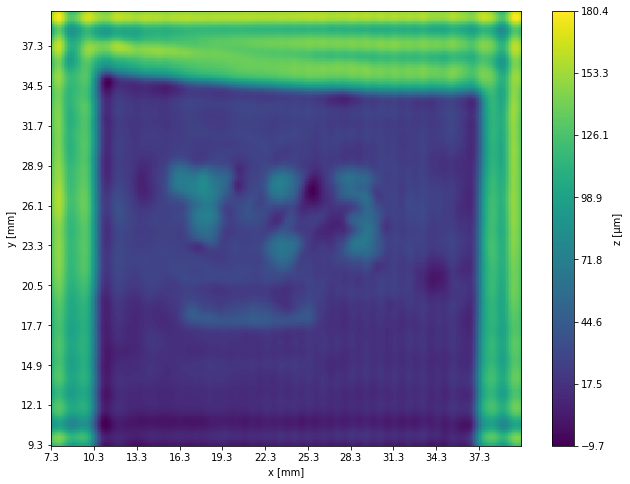

In [79]:
sensor_diameter = 2.57
sensor_sigma = 0.5

stepsize = settings['extent'][0][2]
cut = int(round(sensor_diameter / 2 / stepsize))

signal = z[1][0] -  z[1][0].min()
noise = detrend2D(z[1][0] - z[0][0])
kernel = sensor_function(sensor_diameter / stepsize, sensor_sigma)
z_reconstructed = wiener(signal, kernel, 0.02, 1)
plot(x[cut:-cut], y[cut:-cut], z_reconstructed[cut:-cut,cut:-cut])

(<matplotlib.figure.Figure at 0x7fc53fdda160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc5444f8cc0>)

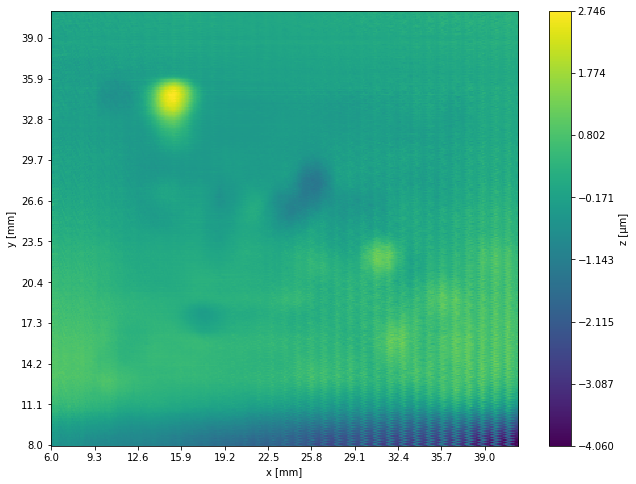

In [58]:
plot(x,y,noise)

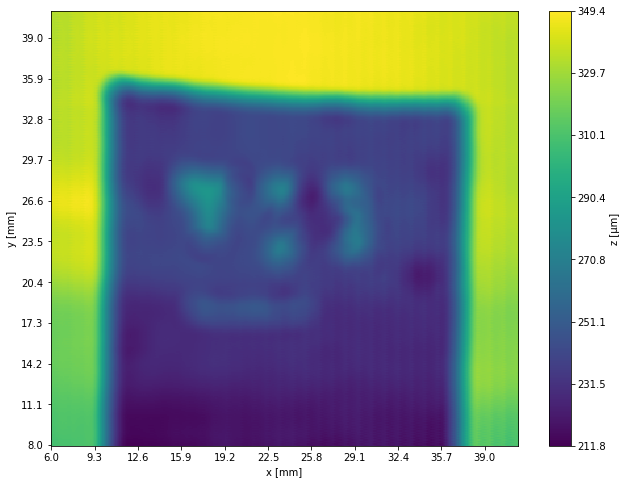

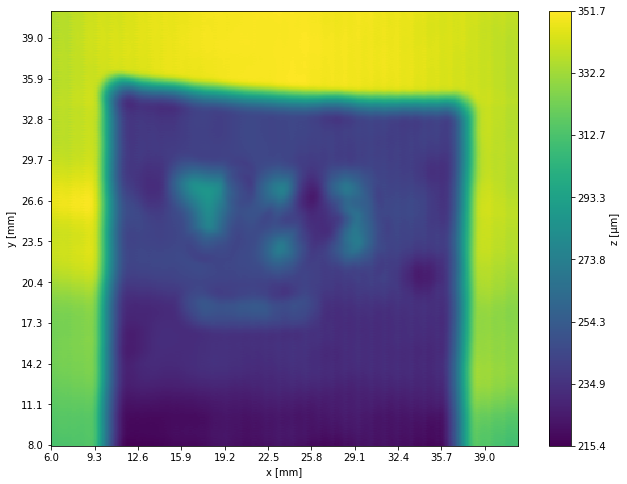

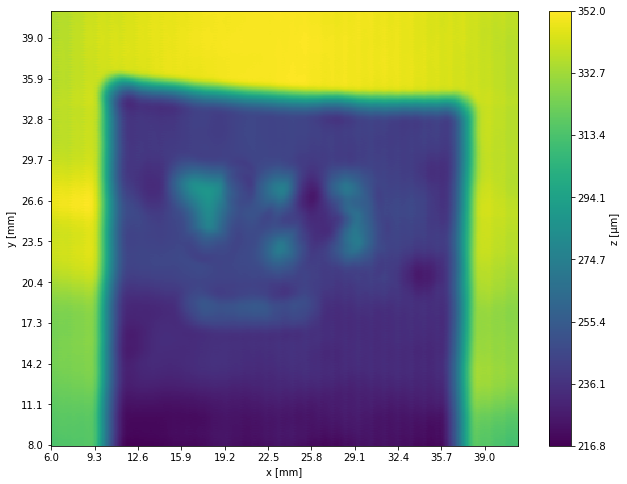

In [7]:
for xi, yi, zi in zip(x, y, z):
    plot(x, y, zi[0])